<a href="https://colab.research.google.com/github/andrevcmelo/BootcampAlura2021/blob/main/BootcampAlura_Modulo01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Importação de Bibliotecas

In [485]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

plt.style.use('ggplot')

#### Importação de Dados

Link da base de dados:
https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A151346189_28_143_208.csv

In [486]:
dados = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A151346189_28_143_208.csv", 
                    encoding="ISO-8859-1", 
                    skiprows = 3, sep=";", skipfooter=12,
                    thousands=".", decimal=",")

#Definindo formato dos registros tipo númerico
pd.options.display.float_format = "{:.2f}".format
#Avaliando as linhas iniciais do dataset
dados.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,...,7948291.63,8438077.45,7656644.83,8047742.98,8657206.23,8150893.68,7507845.13,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,10285455.78,929129659.72
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,-,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,...,2397512.85,2348760.00,3139155.41,2765062.92,4540084.78,4120228.96,2610454.55,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,-,420668039.63
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,...,12789637.85,14376990.41,14240071.26,13594647.25,14584288.95,13158724.61,13169660.32,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15731201.23,15744605.61,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,14726443.67,1771654871.23
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1701611.25,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,...,2755620.24,2878177.60,2921978.36,2794080.79,2512259.50,2508514.18,2635287.45,2914195.21,2881281.13,2740423.51,2695484.62,2613895.43,3020718.8

In [487]:
#Avaliando as linhas finais do dataset
dados.tail()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
22,43 Rio Grande do Sul,30931325.46,57363420.01,51547794.07,56673338.49,48397733.07,52413429.62,56636376.98,56113054.70,55356224.30,53637713.13,53699506.08,58730379.58,57629317.06,58779088.02,63366430.89,62200230.97,61683824.68,62495363.90,64614271.83,66457445.34,66425009.36,65782428.73,63714541.87,64488493.88,66304168.50,61527419.52,62490522.38,66814413.40,67900518.35,64799726.75,68518232.07,68731297.03,66174969.16,66891309.48,67456434.73,67096302.52,60754144.32,58884339.85,66205364.40,...,89585823.81,96174533.70,92176170.61,94228360.83,90655015.78,91242720.70,82934746.93,88817066.36,80572288.45,87419899.25,89396935.52,88148251.61,90754504.49,89093690.14,94010888.97,93664724.68,90025945.36,93081292.31,89050712.34,89664703.23,89259306.50,85585754.75,95152786.47,94163838.23,92237333.46,102298314.76,100260145.30,95917106.56,102331615.05,93971904.79,90775418.13,94908336.74,91437940.91,102876132.83,83000318.02,82381774.95,86051002.13,100531035.83,101374341.51,11958647088.33
23,50 Mato Grosso do Sul,5377392.11,7002472.61,8423933.19,8797487.68,9770421.80,10905392.18,10249299.82,9671553.45,10218511.05,9547923.55,9450010.19,8365709.79,10033643.71,10746263.10,10849523.03,10902848.13,11991649.26,12050259.66,12174950.98,11178470.01,11997775.92,11686533.15,10756188.43,10565385.71,12148432.58,11270972.80,11947693.50,11435565.54,12392541.52,12441459.98,12025317.84,12353546.78,12381792.58,12340247.31,12467693.91,12356930.32,11209008.55,9656677.02,13698836.79,...,15676843.15,16956118.78,17043069.32,17477126.81,15488155.75,16596703.72,15353997.67,16320629.25,18448053.83,16620321.36,16682027.02,17555832.83,17357780.20,17090876.79,16468255.95,17395858.50,16259261.13,16390075.24,15350893.92,17108719.02,17713810.57,16882690.96,18253870.27,17778458.45,18387822.48,19870933.20,18913862.69,19591383.84,18935437.09,17230688.81,17895244.76,18115134.64,19542439.88,19032785.73,17410262.53,17913161.92,17331445.92,18755557.92,19241624.02,2172157981.36
24,51 Mato Grosso,4795299.01,8684882.23,7886243.14,8794109.79,9231645.40,10221763.77,9163314.28,9243148.81,9052354.89,9677093.95,7150345.50,10421826.32,9939399.66,9332546.32,11965500.15,11185014.96,12058150.55,11635436.04,11698836.48,11823239.61,10810420.65,12130636.06,11574096.75,10726251.53,12364760.67,11382133.07,11947040.32,12233217.84,12656421.09,11263407.74,12795267.96,12805173.87,12171713.91,11961452.83,11777799.00,11142684.27,11709080.86,11149107.81,12381255.67,...,15509614.84,16372281.19,16231682.70,16044219.39,16146542.89,15487676.02,14770731.99,17253950.09,14789801.16,17498946.87,16279852.74,16103988.77,15883977.51,17163673.03,15569285.17,15630276.46,15838064.68,14815961.13,13853034.99,14229113.36,15288698.79,16045499.92,15890208.95,16092716.67,16699780.69,16314811.22,16763581.32,15608982.84,15855641.23,15811477.04,15029205.51,15249241.20,15046851.63,14886817.29,12546999.04,13604225.34,13151005.63,16371639.49,17790649.87,2036923784.59
25,52 Goiás,15310637.29,22258668.68,21442515.75,20921212.45,21615970.67,18270043.87,20540517.13,20650730.67,20868443.56,20621423.04,17094580.10,21615561.61,20678552.05,23043942.78,23334312.45,23508108.16,23947606.91,24369848.15,24577126.64,24372626.65,25227845.74,24746686.90,24628958.50,25524615.37,23352380.22,23520045.07,25369725.89,24404417.42,2498

In [488]:
#Avaliando as informações do dataset: tipos de dados, quantidade de colunas e registros
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 154 entries, Unidade da Federação to Total
dtypes: float64(151), object(3)
memory usage: 32.6+ KB


In [489]:
#Avaliando estatísticas básicas dos campos numéricos do dataset
dados.describe()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
count,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,...,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00
mean,15126846.64,22710158.12,24594187.35,25431957.83,26511245.91,27858576.43,28332973.51,27800320.31,27887505.26,27148854.29,24748781.93,28739553.21,27779578.57,28021517.95,31180857.91,30559470.48,32067740.96,31580672.71,32611202.77,33068227.21,32419807.37,32189393.28,31167981.22,31560092.18,29928809.93,32999254.94,33416032.93,33861926.64,32998566.05,33776633.08,34508112.22,33571030.22,33202549.09,34260578.08,33722132.00,33068418.63,32743959.68,34540839.00,34834165.09,35148078.99,...,46592572.02,44858620.70,46445335.60,46943697.67,45819920.30,46310661.30,45372052.00,44512155.12,45130688.08,42984468.06,46280398.95,46872938.71,47404348.88,47142979.23,48204529.71,48763775.45,47130713.08,47999574.50,46453738.64,45127706.24,47713863.09,45430176.33,47199783.51,48164467.53,50274331.13,48455666.28,50858976.35,51086007.98,49509771.01,51159255.15,48652124.79,47233303.11,49148617.53,47618476.39,47593665.11,41013660.39,44193633.75,47329994.46,54495511.57,5993731798.30
std,19159188.30,30879444.07,32516725.69,33339066.25,37540771.63,38676893.04,39292968.91,37748913.80,38226540.65,36671387.56,34302651.64,39263230.84,37988016.94,38472973.83,43107877.67,41375865.01,43820473.72,43730638.41,44931951.46,46760267.58,44723736.91,44657514.59,42490731.84,43451336.50,41128727.38,45902372.56,46619168.65,46583768.83,45800691.66,46621043.56,47569222.69,47049920.20,45173519.54,48351100.75,47965880.74,46035492.78,46621888.15,48716789.21,47927983.93,49430916.96,...,62025560.03,57705113.72,62349149.63,62507148.99,59281419.38,60178793.71,59424265.29,58898151.60,59061757.59,56509401.30,60497498.93,61142944.73,61925710.33,61154374.79,62216643.96,63370716.30,60726402.82,62486400.14,60454412.46,59916454.67,62828831.11,59362996.81,61110607.09,62936176.09,64576982.68,62355902.11,65323980.41,66360324.67,63439145.10,66313422.91,62260089.17,60600178.14,64234554.84,61318083.40,62171030.87,52900705.99,56856933.02,62255310.10,73974287.16,8057806560.09
min,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1746538.99,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1525752.37,1572809.36,1653304.86,1685303.78,1773604.15,1643518.23,1811346.65,1654294.56,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,1344865.94,1067658.62,...,1897787.14,2050824.29,1881406.55,1940174.73,1923150.03,2036787.91,1876731.42,1716855.56,1836149.63,1954823.32,1882553.32,1781034.49,1821567.42,2120412.72,1910968.09,2453555.40,2619709.86,2637161.32,2139141.93,2123426.26,2527888.58,1906429.95,1923440.17,2411628.00,2495491.03,2117098.07,2388704.49,2905190.27,2145557.83,2455947.45,2310514.38,2296699.42,2333822.65,2310195.65,1842472.54,1705873.64,2065055.35,20

#### Tratamentos Iniciais dos Dados

Podemos identificar que Agosto/2020 não foi incluído no describe, pois existe algum dado em formato não numérico. Este problema pode estar afetando alguma outra coluna que não conseguimos ver. 

**Método 1 de Tratamento da Base:**
Exluindo as colunas com valores nulos. Deste modo, perdemos dados de meses por completo, mas mantemos os dados padronizados.

In [490]:
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação")
colunas_usaveis

['Unidade da Federação',
 '2008/Jan',
 '2008/Fev',
 '2008/Mar',
 '2008/Abr',
 '2008/Mai',
 '2008/Jun',
 '2008/Jul',
 '2008/Ago',
 '2008/Set',
 '2008/Out',
 '2008/Nov',
 '2008/Dez',
 '2009/Jan',
 '2009/Fev',
 '2009/Mar',
 '2009/Abr',
 '2009/Mai',
 '2009/Jun',
 '2009/Jul',
 '2009/Ago',
 '2009/Out',
 '2009/Nov',
 '2009/Dez',
 '2010/Jan',
 '2010/Fev',
 '2010/Mar',
 '2010/Abr',
 '2010/Mai',
 '2010/Jun',
 '2010/Jul',
 '2010/Ago',
 '2010/Set',
 '2010/Out',
 '2010/Nov',
 '2010/Dez',
 '2011/Jan',
 '2011/Fev',
 '2011/Mar',
 '2011/Abr',
 '2011/Mai',
 '2011/Jun',
 '2011/Jul',
 '2011/Ago',
 '2011/Set',
 '2011/Out',
 '2011/Nov',
 '2011/Dez',
 '2012/Jan',
 '2012/Fev',
 '2012/Mar',
 '2012/Abr',
 '2012/Mai',
 '2012/Jun',
 '2012/Jul',
 '2012/Ago',
 '2012/Set',
 '2012/Out',
 '2012/Nov',
 '2012/Dez',
 '2013/Jan',
 '2013/Fev',
 '2013/Mar',
 '2013/Abr',
 '2013/Mai',
 '2013/Jun',
 '2013/Jul',
 '2013/Ago',
 '2013/Set',
 '2013/Out',
 '2013/Nov',
 '2013/Dez',
 '2014/Jan',
 '2014/Fev',
 '2014/Mar',
 '2014/Abr',


In [491]:
usaveis = dados[colunas_usaveis]
usaveis.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,5062171.26,...,7700730.62,7948291.63,8438077.45,7656644.83,8047742.98,8657206.23,8150893.68,7507845.13,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,929129659.72
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,2685361.47,...,3268651.85,2397512.85,2348760.00,3139155.41,2765062.92,4540084.78,4120228.96,2610454.55,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,420668039.63
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,10179342.29,...,14585552.51,12789637.85,14376990.41,14240071.26,13594647.25,14584288.95,13158724.61,13169660.32,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15731201.23,15744605.61,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,1771654871.23
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,1344865.94,...,2510634.79,2755620.24,2878177.60,2921978.36,2794080.79,2512259.50,2508514.18,2635287.45,2914195.21,2881281.13,2740423.51,26

In [492]:
usaveis = usaveis.set_index("Unidade da Federação")
usaveis.head(5)

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,5062171.26,4769347.86,...,7700730.62,7948291.63,8438077.45,7656644.83,8047742.98,8657206.23,8150893.68,7507845.13,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,929129659.72
12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,2685361.47,2723636.56,...,3268651.85,2397512.85,2348760.00,3139155.41,2765062.92,4540084.78,4120228.96,2610454.55,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,420668039.63
13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,10179342.29,11061892.22,...,14585552.51,12789637.85,14376990.41,14240071.26,13594647.25,14584288.95,13158724.61,13169660.32,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15731201.23,15744605.61,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,1771654871.23
14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,1344865.94,1067658.62,

**Método 2 de Tratamento da Base:**
Transformando os valores em branco em 0. Deste modo, continuamos com o valor da maioria dos meses, apesar de termos um valor 0 que possa distorcer alguns cálculos.

Portanto, vamos tratar dando *replace()* para inserir 0 nos brancos e alterando todos os tipos de dados das colunas com valores numéricos (2008/Jan até Total).

In [493]:
dados_fill0 = dados.replace('-', 0)
dados_fill0.iloc[:,1:] = dados_fill0.iloc[:,1:].astype('float64')
dados_fill0.describe()
dados_fill0.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,...,7948291.63,8438077.45,7656644.83,8047742.98,8657206.23,8150893.68,7507845.13,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,10285455.78,929129659.72
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,0.00,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,...,2397512.85,2348760.00,3139155.41,2765062.92,4540084.78,4120228.96,2610454.55,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,0.00,420668039.63
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,...,12789637.85,14376990.41,14240071.26,13594647.25,14584288.95,13158724.61,13169660.32,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15731201.23,15744605.61,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,14726443.67,1771654871.23
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1701611.25,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,...,2755620.24,2878177.60,2921978.36,2794080.79,2512259.50,2508514.18,2635287.45,2914195.21,2881281.13,2740423.51,2695484.62,2613895.43,302

**Método 3 de Tratamento da Base:**
Inserindo a média do valor do ano que possui o mês 'null' no valor nulo.

In [494]:
def media_ano(linha, ano_null):
  ano = str(ano_null[0:4])
  linha_df = linha.filter(like=ano, axis=0).dropna()
  media = linha_df.mean()
  return media
  
dados_novo = dados.replace('-', np.nan)

for index, row in dados_novo.iterrows():
  if dados_novo[index:index+1].isnull().sum().sum() >= 1:
    for col in dados_novo[index:index+1].columns[1:]:
      if dados_novo[col].isnull().sum() >= 1:
        df = pd.DataFrame(row)
        v_media = media_ano(df,col)
        dados_novo[index:index+1][col].fillna(v_media, inplace=True)

dados_novo.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4535: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4535: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,...,7948291.63,8438077.45,7656644.83,8047742.98,8657206.23,8150893.68,7507845.13,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,10285455.78,929129659.72
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,2485375.29,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,...,2397512.85,2348760.00,3139155.41,2765062.92,4540084.78,4120228.96,2610454.55,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,3138417.09,420668039.63
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,...,12789637.85,14376990.41,14240071.26,13594647.25,14584288.95,13158724.61,13169660.32,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15731201.23,15744605.61,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,14726443.67,1771654871.23
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1701611.25,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,...,2755620.24,2878177.60,2921978.36,2794080.79,2512259.50,2508514.18,2635287.45,2914195.21,2881281.13,2740423.51,2695484.62,26

**Decidi utilizar o dataset do Médoto 3 para dar continuidade nas análises, pois o valor tende a ser mais próximo a uma realidade.**

O campo *'Unidade da Federação'* está com um código + nome da UF. Irei tratar para separar estes valores e deixar os campos melhor apresentados.

In [495]:
dados_novo.iloc[:,1:] = dados_novo.iloc[:,1:].astype('float64')
#Adição da Coluna 'Cod_UF' com o número do Estado
dados_novo['Cod_UF'] = dados_novo['Unidade da Federação'].str.slice(0,2)
#Alteração do campo 'Unidade da Federação' para ter somente o valor texto com o nome do Estado
dados_novo['Unidade da Federação']  = dados_novo['Unidade da Federação'].str.slice(3,)

dados_novo[['Cod_UF','Unidade da Federação']].head(5)

,Cod_UF,Unidade da Federação
0,11,Rondônia
1,12,Acre
2,13,Amazonas
3,14,Roraima
4,15,Pará


Apresentando a versão final da base de dados

In [496]:
dados_novo = dados_novo.sort_values('Total', ascending=False).set_index('Unidade da Federação')
dados_novo.head(5)

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total,Cod_UF
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
São Paulo,91678473.48,148677526.82,156087269.23,161227125.43,187119397.64,187291126.07,194398399.48,184854516.35,188636359.55,179706467.00,167990352.53,191857317.83,182797194.35,186855294.82,212777859.48,203186114.01,217040531.70,217195249.91,220761157.51,232536720.14,220292973.66,221987951.33,220117480.90,209094405.40,214565774.66,203116173.19,227248380.06,231543598.66,230188803.42,226021072.14,229662643.34,234530618.12,233453453.42,221127119.42,239790045.49,236929144.68,227533337.27,231062206.94,241947462.16,236443416.78,...,297881361.74,297309345.90,280813753.04,285740593.74,280768835.63,280080500.10,279203782.81,269524844.81,286775733.92,289711791.16,293104281.74,287922148.67,291524922.05,298702204.56,282739086.76,295671659.07,283947815.42,283179040.80,298180056.65,279427204.24,288819396.39,297834670.24,303889049.22,293587709.50,305033842.80,313868712.55,298547868.27,310847061.00,292851698.72,284749770.52,304505286.22,288872273.89,297335842.20,251320040.41,272486957.70,306425499.30,366721243.71,346512263.17,38929549655.89,35
Minas Gerais,45671659.76,70194037.10,79231336.95,77136537.58,80554440.63,94758522.83,85360064.11,84722528.10,84601757.95,85559789.46,78329947.11,86917741.55,91374305.25,90153672.61,95290591.54,94091211.77,99076844.10,96189182.42,102754354.58,100080062.68,96911075.38,97956440.66,100726279.56,95354390.87,99017646.65,91519360.96,101602091.09,102020854.18,103346519.08,102489257.42,104427655.72,104334532.58,102057421.34,102296496.62,104624739.27,106029536.34,102848906.27,103097090.32,107148899.31,109395956.79,...,146849636.29,152645703.34,144488574.05,143939472.31,145123339.34,142848565.53,143158486.97,136705143.41,149829968.56,149894503.75,151546897.83,151514201.61,156680218.93,154281495.01,153867888.29,151228318.67,144867656.44,146715346.61,154066649.81,147968852.80,153459790.69,156777495.40,162963014.15,154830086.49,166207471.07,164287071.70,156567882.88,165120780.19,153006371.54,153880105.15,159196641.54,150118896.34,142773027.09,133340766.09,133388804.72,139699763.30,164891823.64,168024412.95,19160106499.88,31
Paraná,38266347.46,55384670.52,53801318.85,52460306.69,54419620.71,57811688.48,58094241.83,56982774.90,57549082.26,57121887.41,53117936.61,63910909.46,64523066.04,60783727.39,65633573.31,64759375.78,65902215.41,66280753.00,69158603.32,68256573.41,65843824.73,66394412.26,66395558.19,67070814.17,65492818.75,62237724.45,70702537.78,70374693.61,72058180.69,71935547.82,72371869.39,74708055.69,72785908.90,72851750.47,75595725.52,74366096.98,75110313.47,72128616.95,73759982.82,76599030.33,...,116359245.54,117872309.11,111878379.52,115332028.47,114669021.47,115173908.32,118799559.86,110307818.83,116630188.99,120061032.48,121360733.68,122174618.88,124610255.04,127874482.35,123933024.51,125316844.05,125317336.68,117528767.93,122460918.04,119836506.38,123286810.02,120177202.18,126481772.97,125528571.51,125978907.59,126174536.45,126954366.08,131578320.06,127090701.66,117896293.89,122349509.69,127000113.31,117308075.66,94599403.51,107503816.77,96977288.37,109658360.43,129375911.54,13786964617.27,41
Rio Grande do Sul,30931325.46,57363420.01,51547794.07,56673338.49,48397733.07,52413429.62,56636376.98,5611

In [497]:
dados_novo.index

Index(['São Paulo', 'Minas Gerais', 'Paraná', 'Rio Grande do Sul',
       'Rio de Janeiro', 'Bahia', 'Pernambuco', 'Santa Catarina', 'Ceará',
       'Goiás', 'Pará', 'Maranhão', 'Espírito Santo', 'Rio Grande do Norte',
       'Paraíba', 'Distrito Federal', 'Mato Grosso do Sul', 'Piauí', 'Alagoas',
       'Mato Grosso', 'Amazonas', 'Sergipe', 'Tocantins', 'Rondônia', 'Acre',
       'Roraima', 'Amapá'],
      dtype='object', name='Unidade da Federação')

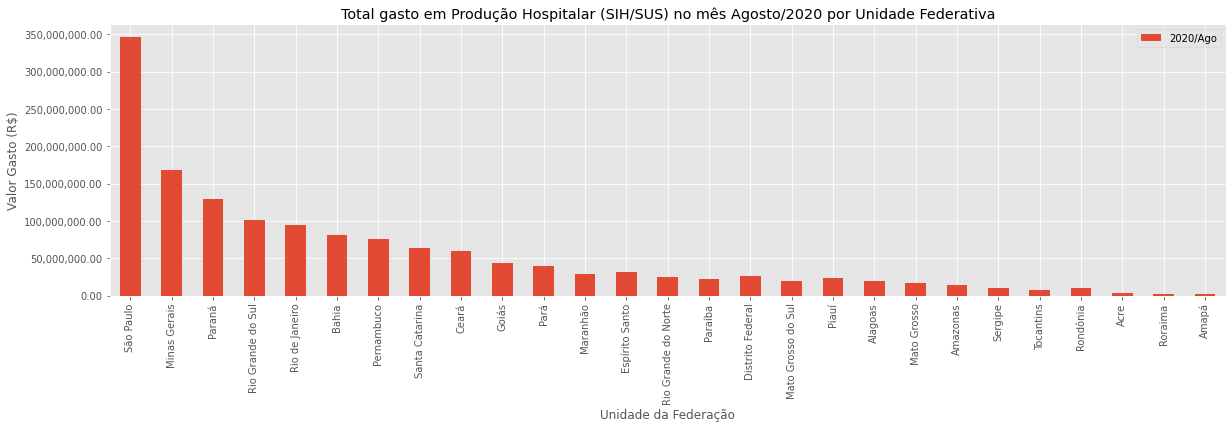

In [498]:
#Gráfico inicial para os gastos de Agosto/2020 por ciadade
ax = dados_novo.plot(y='2020/Ago', kind = 'bar', figsize=(20,5))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_ylabel('Valor Gasto (R$)')
plt.title('Total gasto em Produção Hospitalar (SIH/SUS) no mês Agosto/2020 por Unidade Federativa')
plt.show()

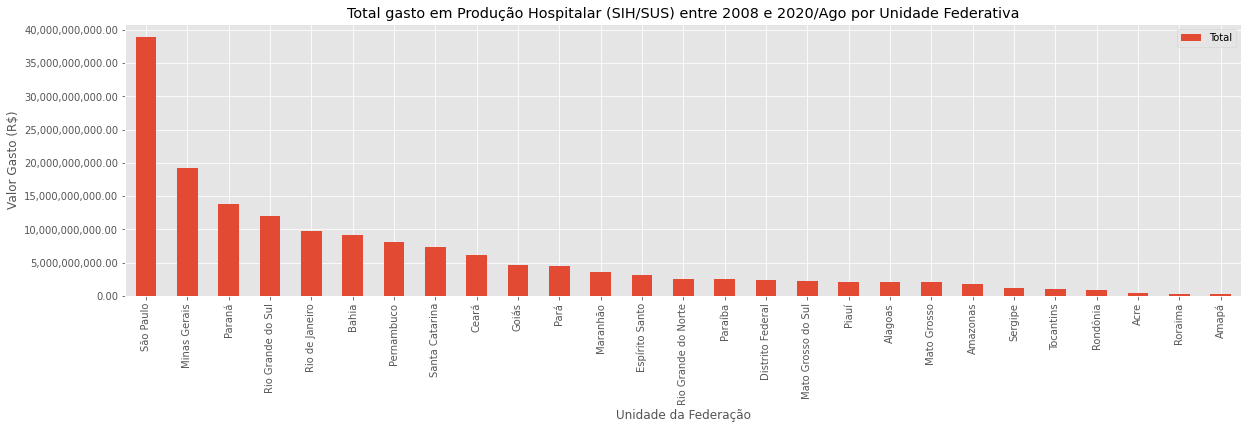

In [499]:
#Gráfico com os gastos históricos por UF
ax = dados_novo.plot(y='Total', kind = 'bar', figsize=(20,5))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_ylabel('Valor Gasto (R$)')
plt.title('Total gasto em Produção Hospitalar (SIH/SUS) entre 2008 e 2020/Ago por Unidade Federativa')
plt.show()

In [500]:
dados_novo_invertido

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,Pará,Maranhão,Espírito Santo,Rio Grande do Norte,Paraíba,Distrito Federal,Mato Grosso do Sul,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008/Jan,91678473.48,45671659.76,38266347.46,30931325.46,23025258.52,21211522.47,14393949.89,16504913.45,15539821.90,15310637.29,18864744.11,10723506.39,5456723.98,5947814.08,10723002.45,4745919.19,5377392.11,7985142.43,6243726.32,4795299.01,4735529.42,2780750.11,3441592.69,1388528.39,902416.00,657889.53,1120973.34
2008/Fev,148677526.82,70194037.10,55384670.52,57363420.01,28394310.93,28189304.95,24181400.95,25651429.11,25735101.55,22258668.68,19553758.20,13559679.41,9102212.86,9509755.83,11386274.47,7632480.67,7002472.61,10079928.25,8376622.16,8684882.23,7118990.57,3676483.16,4985688.85,2931283.42,1497206.26,777939.31,1268740.33
2008/Mar,156087269.23,79231336.95,53801318.85,51547794.07,44567062.94,34181483.52,29991302.71,26743524.89,28724625.75,21442515.75,21937342.70,13985142.36,10249595.97,10352238.59,12053643.87,9647203.26,8423933.19,10298372.45,8408336.22,7886243.14,8196635.49,5051473.61,6205612.60,1541682.52,1794028.48,718688.03,974651.24
2008/Abr,161227125.43,77136537.58,52460306.69,56673338.49,44054604.82,39026934.13,34806197.97,27181488.26,30676457.06,20921212.45,20842829.69,14809416.46,11253833.56,10855108.50,12653528.76,11098732.99,8797487.68,10775976.33,9090794.82,8794109.79,8259378.42,5046063.36,4984482.09,1525314.96,1730469.42,839994.39,1141137.32
2008/Mai,187119397.64,80554440.63,54419620.71,48397733.07,44911021.15,42949566.82,32147987.35,26845308.18,30604453.47,21615970.67,23249952.88,14505727.38,10198619.17,11160168.19,12215107.11,12891719.72,9770421.80,10398360.88,9338771.45,9231645.40,7831399.90,4741151.56,5511002.46,1645953.84,1819443.92,862347.96,866346.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020/Jul,366721243.71,164891823.64,109658360.43,100531035.83,98722687.54,83992134.91,74192800.58,63467828.84,55180751.48,39405050.36,38438873.79,32936503.37,33290880.33,26302373.94,26902438.72,25269773.34,18755557.92,17871598.61,18351680.84,16371639.49,19346450.18,10313262.56,9131707.60,11152107.08,3915193.20,3015488.30,3249565.87
2020/Ago,346512263.17,168024412.95,129375911.54,101374341.51,95274486.35,80793117.08,75704177.72,63972379.36,59808605.59,43984702.05,39911193.02,28587541.78,32188873.88,24929930.72,22130016.81,26526196.39,19241624.02,23210624.20,19754741.78,17790649.87,14726443.67,11014180.89,8240261.38,10285455.78,3138417.09,2826486.18,2942273.94
Total,38929549655.89,19160106499.88,13786964617.27,11958647088.33,9696364115.11,9193802684.16,8046954289.39,7324100054.96,6197357245.98,4657350310.70,4437115730.71,3632860959.84,3139189177.73,2477372149.60,2470550104.25,2429933198.76,2172157981.36,2130616492.35,2104405303.11,2036923784.59,1771654871.23,1130337049.71,999998621.85,929129659.72,420668039.63,305010883.18,291637984.75
Cod_UF,35,31,41,43,33,29,26,42,23,52,15,21,32,24,25,53,50,22,27,51,13,28,17,11,12,14,16


Inserindo Região aos Estados

In [501]:
dados_novo['Região'] = ''

for index,row in dados_novo.iterrows():
  if index == 'São Paulo' or index ==  'Rio de Janeiro' or index ==  'Minas Gerais' or index ==  'Espírito Santo':
    dados_novo.loc[index, 'Região'] = "Sudeste"
  elif index == 'Amazonas' or index ==  'Roraima' or index ==  'Rondônia' or index ==  'Amapá' or index ==  'Acre' or index ==  'Pará' or index ==  'Tocantins':
    dados_novo.loc[index, 'Região'] = "Norte"
  elif index == 'Mato Grosso' or index ==  'Mato Grosso do Sul' or index ==  'Goiás' or index ==  'Distrito Federal':
    dados_novo.loc[index, 'Região'] = "Centro-Oeste"
  elif index == 'Santa Catarina' or index ==  'Rio Grande do Sul' or index ==  'Paraná':
    dados_novo.loc[index, 'Região'] = "Sul"
  else:
    dados_novo.loc[index, 'Região'] = "Nordeste"


In [502]:
dados_novo_invertido = dados_novo.sort_values('Total', ascending=False).T
dados_novo_invertido2 = dados_novo_invertido.drop(["Total","Cod_UF","Região"])

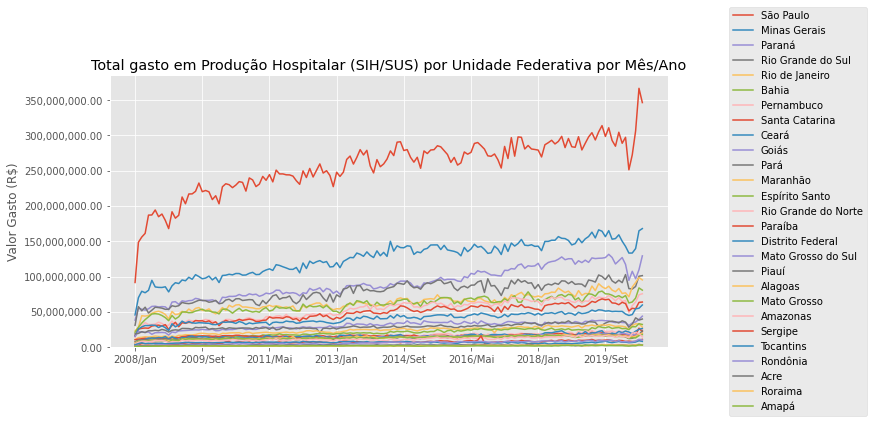

In [503]:
ax = dados_novo_invertido2.plot(figsize=(10,5))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_ylabel('Valor Gasto (R$)')
plt.ylim(0,)
plt.title('Total gasto em Produção Hospitalar (SIH/SUS) por Unidade Federativa por Mês/Ano')
ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.show()

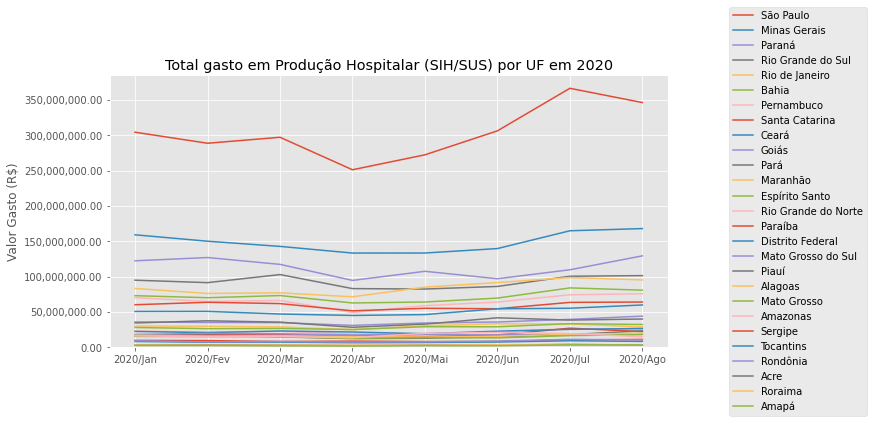

In [520]:
ax = dados_novo_invertido2.loc['2020/Jan':].plot(figsize=(10,5))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_ylabel('Valor Gasto (R$)')
plt.ylim(0,)
plt.title('Total gasto em Produção Hospitalar (SIH/SUS) por UF em 2020')
ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.show()

Agrupando os valores por Região

In [510]:
dados_regiao = pd.DataFrame(dados_novo.reset_index(drop=True).groupby('Região').sum('Total'))
dados_regiao.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
Região,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Centro-Oeste,30229247.60,45578504.19,47399895.34,49611542.91,53509757.59,52247325.49,52518777.97,53276290.82,53304415.70,54895047.77,45038102.41,55130658.78,53100416.54,53501743.79,59993720.19,58610439.74,63196728.91,63894989.85,62526556.94,62444623.46,62523095.63,63358616.04,60929391.38,59048172.29,62017930.88,58971107.41,64030568.60,62324704.17,64029030.34,61688970.94,64263618.40,66850400.90,64934598.66,62420869.33,63933820.62,62653188.33,61774776.35,59803757.77,68917193.73,69565262.37,...,81080093.70,82845750.31,85419068.47,87411523.84,83947084.79,84743937.29,81484915.10,83458651.92,81213468.36,89813404.98,86611055.49,87325145.39,90320816.60,91565971.85,89255553.53,87269745.96,85180303.08,81420006.41,79522197.78,86692650.24,85157069.25,91853240.42,88966685.68,92391941.49,92511604.01,96171126.14,96966360.49,90541012.77,89959031.50,88603665.23,86566987.18,91481380.62,90238478.93,91660760.15,82390344.07,84880811.73,88888259.97,99802021.11,107543172.33,11296365275.41
Nordeste,95549236.04,134694550.73,153046619.08,167740477.39,168061294.21,174175276.89,177468464.39,174109441.29,173410656.47,165710324.70,153162228.67,178958400.60,161275540.20,172933736.48,193456354.99,192939207.77,201794145.05,196937822.81,199504464.17,200828759.45,205095590.61,202660481.80,201641760.44,198140172.85,195183584.52,185335583.97,205815390.02,211564608.98,210887028.56,200573690.09,205178183.64,214990485.86,202882691.03,204988891.88,208099629.62,200393728.81,202813746.74,201090572.28,208453179.11,218015003.68,...,291729204.06,286301633.14,289301311.85,293904777.50,301054138.42,285323031.55,281312136.13,285147463.89,269286958.01,291498626.74,297300181.60,304211639.26,293424544.46,307846825.52,310534503.33,296151612.52,303098260.28,295463309.67,281185829.30,299639707.04,281522047.53,299954357.62,305121095.18,321163055.47,306798968.39,320555832.54,321880404.04,314216965.36,320397480.13,310753760.05,299234210.62,306914581.95,296552600.98,294058369.15,252481578.43,269020187.07,297869801.39,346043545.01,345932936.57,37384256278.39
Norte,31111673.48,38133606.94,41368641.06,39323606.29,41786447.14,42153961.69,46817070.73,45797885.42,48086682.93,45339281.23,40399486.79,45305661.91,45942006.21,44316806.08,51777252.96,51854344.38,51986020.34,50114708.25,53555754.73,53094110.29,54067845.27,53767886.65,49324202.20,51290856.32,51134610.72,50125462.94,53006749.67,52912221.69,54837151.71,54943063.61,54437521.56,52633156.86,53192532.89,53819623.85,53997143.51,51807947.46,54994036.14,51646496.74,53602489.18,56067475.16,...,66536861.23,68531487.18,68710339.57,70264133.04,71573687.78,68536898.96,67267305.18,66830087.35,65998000.69,69238448.24,70726089.02,68480881.39,72421141.54,70058096.70,72768779.04,71197568.20,76491518.05,71140874.37,69768972.11,73526441.31,68054351.30,72543941.97,75563076.06,77100496.31,72920735.69,71109586.44,73644562.10,76421192.18,77744846.74,77230413.44,73836893.27,76407310.78,75454124.81,73738000.37,62252367.81,74339710.37,87090234.26,88249386.02,82070531.06,9155215791.07
Sudeste,165832115.74,256368087.71,290135265.09,293672101.39,322783478.59,343470119.43,342666217.02,333078346.82,335235903.56,324357208.00,297684366.77,343153774.38,332247499.04,337262

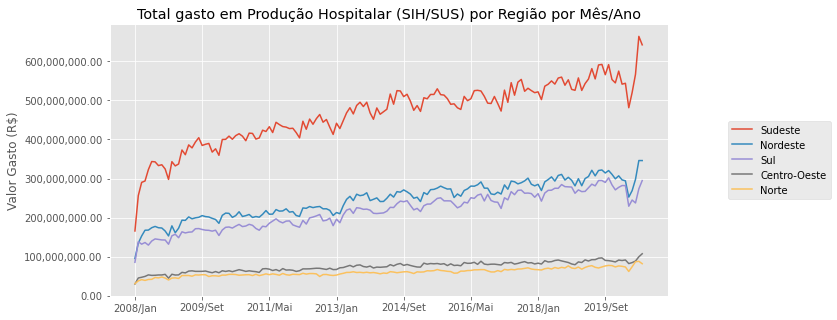

In [512]:
dados_regiao_grafico = dados_regiao.sort_values('Total', ascending=False).drop(columns='Total')
ax = dados_regiao_grafico.T.plot(figsize=(10,5))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_ylabel('Valor Gasto (R$)')
plt.ylim(0,)
plt.title('Total gasto em Produção Hospitalar (SIH/SUS) por Região por Mês/Ano')
ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.show()